# Final project: World Happiness

Maaike de Jong  
June 2020

Ironhack Amsterdam  
Data Analytics part-time

In [1]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler

In [2]:
# import data

df = pd.read_csv('dfML.csv')
df.head()

,Country,Region,Score mean,Access to electricity (% of population),CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of origin,"Population, total",Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,Switzerland,Western Europe,7.5114,100.0,4.732688,82645.581204,86.791615,3.951600e+04,83.026287,11.656622,...,1.052495,6.0,30.800,15.000000,8.181440e+06,22.946425,7.0,9.660123,73.697333,0.000002
1,Iceland,Western Europe,7.5110,100.0,5.921191,55453.949873,96.981917,1.002500e+05,82.454472,7.178653,...,1.133978,7.0,41.440,2.833333,3.301440e+05,76.467214,7.0,17.914355,93.675778,0.000009
2,Denmark,Western Europe,7.5460,100.0,7.003336,58721.482142,94.347397,4.208778e+04,80.440108,11.047112,...,0.531352,6.9,38.311,7.750000,5.659816e+06,27.220085,6.0,17.921347,87.377222,0.000001
3,Norway,Western Europe,7.5410,100.0,10.416053,87977.602660,95.537903,3.651633e+05,81.969919,7.697953,...,1.059666,7.0,39.903,10.000000,5.121086e+06,57.320681,6.0,17.060995,80.678222,0.000002
4,Canada,North America,7.3506,100.0,15.234180,48056.677329,86.422500,9.093510e+06,81.732249,7.558178,...,1.078803,6.0,25.365,93.222222,3.544359e+07,22.181059,6.0,9.687049,81.209556,0.000003


In [3]:
# check whether the columns are the right data type

df.info()

# still have to remove 'country' and 'region' columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 22 columns):
Country                                                                   161 non-null object
Region                                                                    161 non-null object
Score mean                                                                161 non-null float64
Access to electricity (% of population)                                   161 non-null float64
CO2 emissions (metric tons per capita)                                    159 non-null float64
GDP per capita (current US$)                                              160 non-null float64
Individuals using the Internet (% of population)                          161 non-null float64
Land area (sq. km)                                                        159 non-null float64
Life expectancy at birth, total (years)                                   161 non-null float64
PM2.5 air pollution, mean annual exposure 

In [4]:
# Check for missing values

df.isnull().sum()

Country                                                                   0
Region                                                                    0
Score mean                                                                0
Access to electricity (% of population)                                   0
CO2 emissions (metric tons per capita)                                    2
GDP per capita (current US$)                                              1
Individuals using the Internet (% of population)                          0
Land area (sq. km)                                                        2
Life expectancy at birth, total (years)                                   0
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    2
People using at least basic drinking water services (% of population)     1
Population density (people per sq. km of land area)                       2
Population growth (annual %)                                              1
Primary educ

In [5]:
# make correlation matrix

corr = df.corr()
corr

,Score mean,Access to electricity (% of population),CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of origin,"Population, total",Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
Score mean,1.000000,0.702713,0.536256,0.730542,0.812261,0.141994,0.784657,-0.446084,0.717666,0.080619,-0.287495,-0.021069,0.257630,-0.290377,-0.036458,-0.502516,-0.019982,0.145543,0.713340,-0.326673
Access to electricity (% of population),0.702713,1.000000,0.455525,0.430134,0.758382,0.076589,0.845515,-0.285048,0.922277,0.098096,-0.496179,-0.320714,0.044998,-0.120269,0.053852,-0.765932,0.149716,0.078106,0.661562,-0.191048
CO2 emissions (metric tons per capita),0.536256,0.455525,1.000000,0.617697,0.631672,0.187306,0.481541,0.005924,0.481558,0.092938,0.014238,-0.015286,-0.023985,-0.130199,-0.006917,-0.554194,-0.018991,0.016409,0.550992,-0.150055
GDP per capita (current US$),0.730542,0.430134,0.617697,1.000000,0.765047,0.077546,0.646339,-0.338307,0.492687,0.211524,-0.159437,0.148802,0.245712,-0.159967,-0.054636,-0.369539,-0.015978,0.153952,0.618551,-0.179207
Individuals using the Internet (% of population),0.812261,0.758382,0.631672,0.765047,1.000000,0.076665,0.847968,-0.447879,0.773305,0.172589,-0.421373,-0.095351,0.204741,-0.212704,-0.057503,-0.633693,0.091446,0.170274,0.772978,-0.233418
Land area (sq. km),0.141994,0.076589,0.187306,0.077546,0.076665,1.000000,0.049203,-0.007061,0.062361,-0.084941,-0.044916,-0.055720,-0.030884,0.000481,0.441101,-0.117738,-0.047128,-0.083152,0.118384,-0.048149
"Life expectancy at birth, total (years)",0.784657,0.845515,0.481541,0.646339,0.847968,0.049203,1.000000,-0.393118,0.849236,0.200141,-0.453462,-0.178560,0.198120,-0.173228,0.011133,-0.671777,0.110178,0.180479,0.701571,-0.228844
"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",-0.446084,-0.285048,0.005924,-0.338307,-0.447879,-0.007061,-0.393118,1.000000,-0.329084,0.009944,0.464734,-0.035064,-0.258317,0.212699,0.296734,0.153915,0.032203,-0.246852,-0.343588,0.187958
People using at least basic drinking water services (% of population),0.717666,0.922277,0.481558,0.492687,0.773305,0.062361,0.849236,-0.329084,1.000000,0.131360,-0.524909,-0.249839,0.047372,-0.189344,0.036116,-0.739745,0.129896,0.116835,0.702829,-0.227167
Population density (people per sq. km of land area),0.080619,0.098096,0.092938,0.211524,0.172589,-0.084941,0.200141,0.009944,0.131360,1.000000,-0.017618,0.038225,-0.014730,-0.035647,-0.004962,-0.167585,-0.163414,0.022923,0.220409,-0.037102


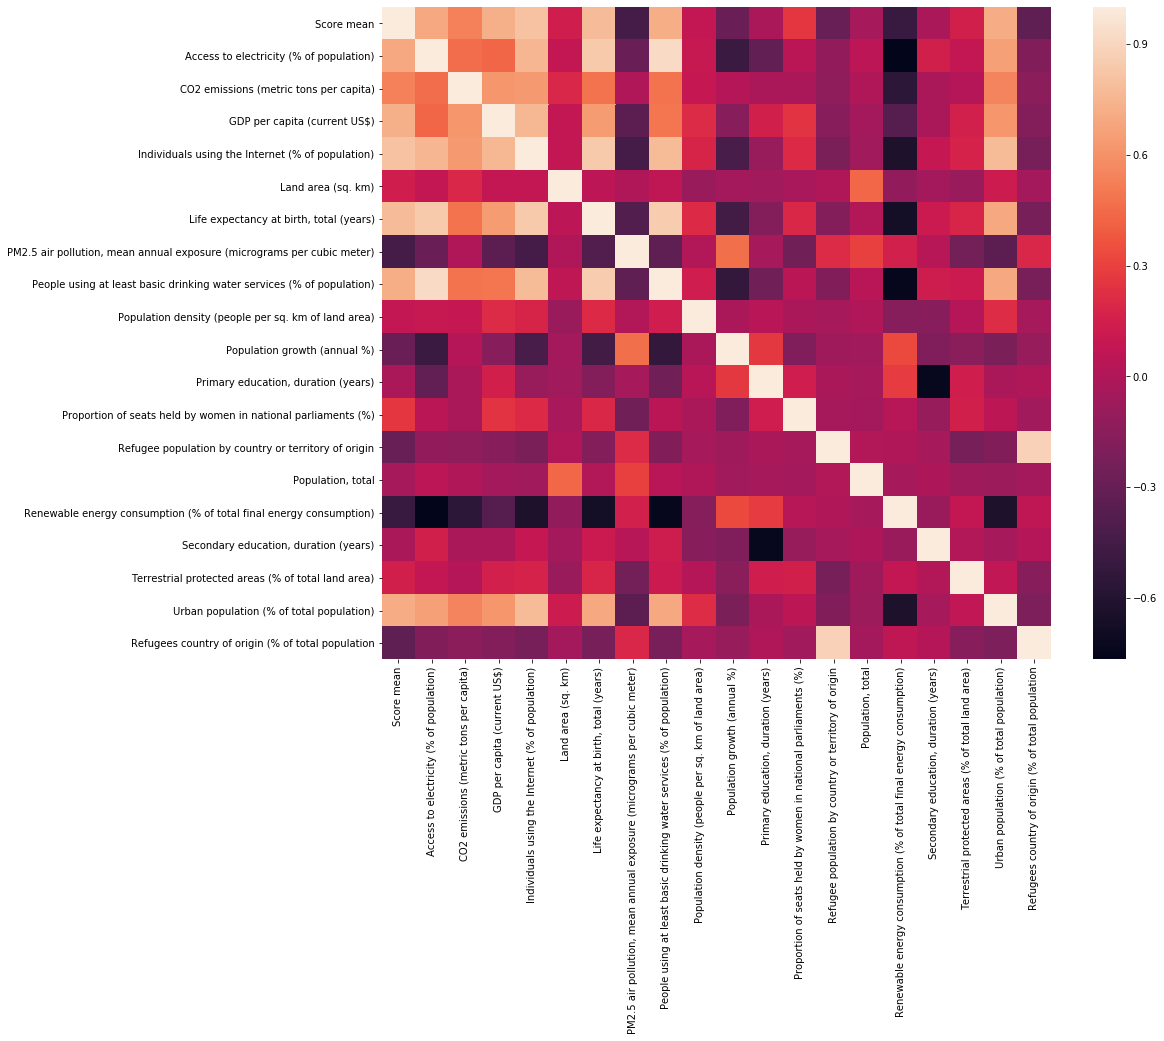

In [6]:
# make heatmap of correlation


plt.figure(figsize=(15,12))
sns.heatmap(corr)

In [7]:
# remove columns that have high correlations with other columns or are redundant:

# Country
# Region
# Access to electricity (% of population)
# Refugee population by country or territory of origin
# Population, total

df2 = df.drop(['Country', 'Region', 'Access to electricity (% of population)', 'Refugee population by country or territory of origin', 'Population, total'], axis=1)
df2.head()

,Score mean,CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,7.5114,4.732688,82645.581204,86.791615,3.951600e+04,83.026287,11.656622,100.000000,207.041205,1.052495,6.0,30.800,22.946425,7.0,9.660123,73.697333,0.000002
1,7.5110,5.921191,55453.949873,96.981917,1.002500e+05,82.454472,7.178653,99.999999,3.293207,1.133978,7.0,41.440,76.467214,7.0,17.914355,93.675778,0.000009
2,7.5460,7.003336,58721.482142,94.347397,4.208778e+04,80.440108,11.047112,99.999999,134.484524,0.531352,6.9,38.311,27.220085,6.0,17.921347,87.377222,0.000001
3,7.5410,10.416053,87977.602660,95.537903,3.651633e+05,81.969919,7.697953,100.000000,14.024149,1.059666,7.0,39.903,57.320681,6.0,17.060995,80.678222,0.000002
4,7.3506,15.234180,48056.677329,86.422500,9.093510e+06,81.732249,7.558178,99.353377,3.897680,1.078803,6.0,25.365,22.181059,6.0,9.687049,81.209556,0.000003


In [8]:
# check for rows with missing values

df2[df2.isnull().any(axis=1)]

,Score mean,CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
50,5.75860,1.736490,3158.653109,57.099315,32873.333333,71.019000,17.662886,87.773846,123.866887,NaN,4.0,21.094000,11.532727,7.0,4.150356,42.553000,0.001275
66,5.60620,NaN,3786.016418,86.668314,10887.000000,71.063957,NaN,NaN,166.098099,0.516566,NaN,NaN,20.718592,NaN,NaN,NaN,NaN
69,5.45280,6.144035,40467.773639,80.390820,1050.000000,83.979133,NaN,99.876504,6891.523810,0.737015,6.0,NaN,0.889434,6.2,41.889120,100.000000,0.000003
104,4.73660,0.566854,2942.885665,52.261397,6020.000000,73.320333,33.181225,95.591411,693.250701,2.377013,4.0,NaN,12.389768,8.0,8.359252,75.131000,0.023210
114,4.24175,0.317103,2003.160548,21.760037,NaN,64.065444,51.586651,56.612986,NaN,2.366133,6.0,27.300000,61.762116,5.0,2.281175,33.762778,0.015965
152,3.29220,2.254463,NaN,27.236616,183630.000000,70.751889,42.502831,96.756883,103.235133,-2.517698,5.2,12.600000,1.927706,6.8,0.686869,53.381000,0.178672
155,7.03900,NaN,29172.397755,62.001665,8870.000000,79.156149,9.415499,97.111481,395.371552,-1.750670,6.0,NaN,1.133982,6.0,7.326110,93.672444,NaN
159,3.38250,0.137748,1408.965472,5.700656,NaN,56.401333,44.379443,40.953861,NaN,2.031070,6.0,27.384444,32.200623,6.0,15.501001,18.672778,0.093053


In [10]:
# drop these rows for ML analysis

df_clean = df2.drop([df2.index[50], df2.index[66], df2.index[69], df2.index[104], df2.index[114], df2.index[152], df2.index[155], df2.index[159]])


In [11]:
# check missing values again

df_clean.isnull().sum()

Score mean                                                                0
CO2 emissions (metric tons per capita)                                    0
GDP per capita (current US$)                                              0
Individuals using the Internet (% of population)                          0
Land area (sq. km)                                                        0
Life expectancy at birth, total (years)                                   0
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    0
People using at least basic drinking water services (% of population)     0
Population density (people per sq. km of land area)                       0
Population growth (annual %)                                              0
Primary education, duration (years)                                       0
Proportion of seats held by women in national parliaments (%)             0
Renewable energy consumption (% of total final energy consumption)        0
Secondary ed

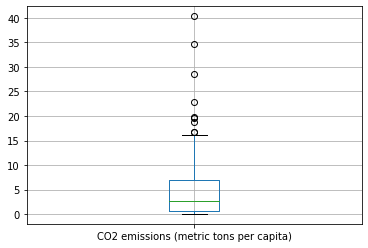

In [12]:
# visualize distribution of variables

df_clean[['CO2 emissions (metric tons per capita)']].boxplot(figsize = (6, 4))

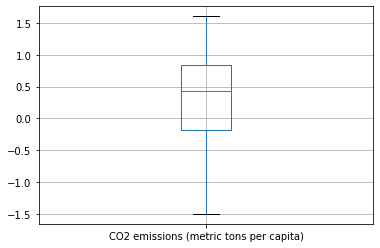

In [13]:
# improved with log transformation?

np.log10(df_clean[['CO2 emissions (metric tons per capita)']]).boxplot(figsize = (6, 4))

# Yes, use log transformation

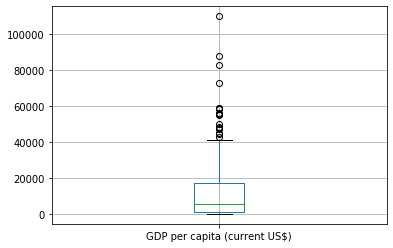

In [14]:
df_clean[['GDP per capita (current US$)']].boxplot(figsize = (6, 4))

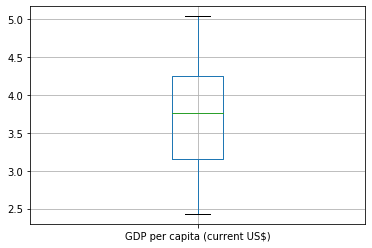

In [15]:
# improved with log transformation?

np.log10(df_clean[['GDP per capita (current US$)']]).boxplot(figsize = (6, 4))

# Yes, use log transformation

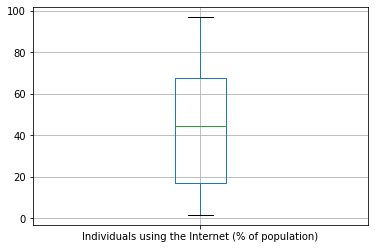

In [16]:
df_clean[['Individuals using the Internet (% of population)']].boxplot(figsize = (6, 4))

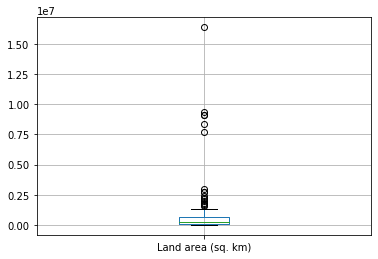

In [17]:
df_clean[['Land area (sq. km)']].boxplot(figsize = (6, 4))

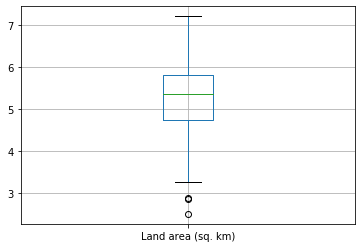

In [18]:
# improved with log transformation?

np.log10(df_clean[['Land area (sq. km)']]).boxplot(figsize = (6, 4))

# Yes, use log transformation

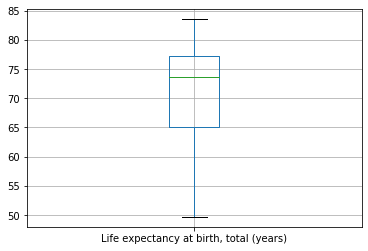

In [19]:
df_clean[['Life expectancy at birth, total (years)']].boxplot(figsize = (6, 4))

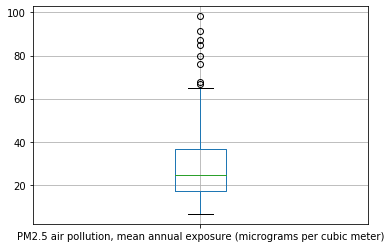

In [20]:
df_clean[['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)']].boxplot(figsize = (6, 4))

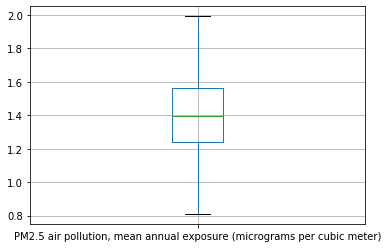

In [21]:
# improved with log transformation?

np.log10(df_clean[['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)']]).boxplot(figsize = (6, 4))

# Yes, use log transformation

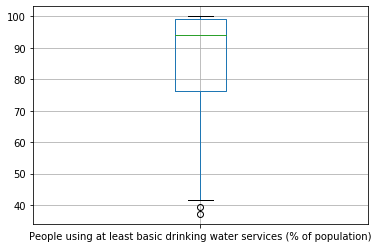

In [22]:
df_clean[['People using at least basic drinking water services (% of population)']].boxplot(figsize = (6, 4))

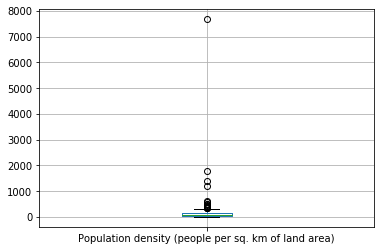

In [23]:
df_clean[['Population density (people per sq. km of land area)']].boxplot(figsize = (6, 4))

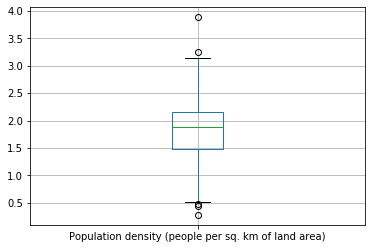

In [24]:
# improved with log transformation?

np.log10(df_clean[['Population density (people per sq. km of land area)']]).boxplot(figsize = (6, 4))

# Yes, use log transformation

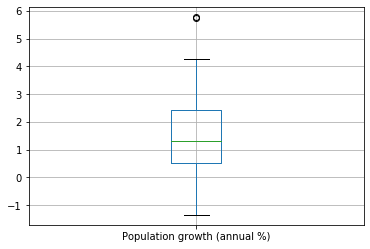

In [25]:
df_clean[['Population growth (annual %)']].boxplot(figsize = (6, 4))

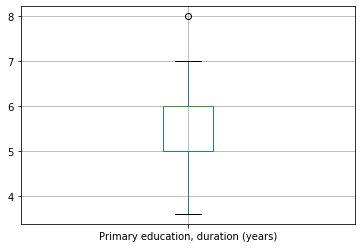

In [26]:
df_clean[['Primary education, duration (years)']].boxplot(figsize = (6, 4))

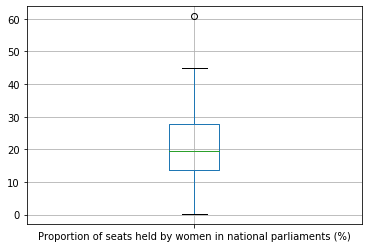

In [27]:
df_clean[['Proportion of seats held by women in national parliaments (%)']].boxplot(figsize = (6, 4))

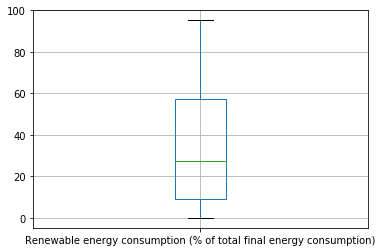

In [28]:
df_clean[['Renewable energy consumption (% of total final energy consumption)']].boxplot(figsize = (6, 4))

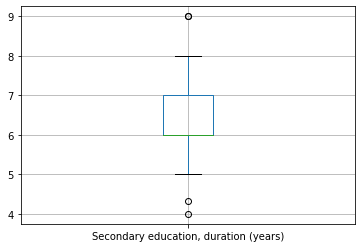

In [29]:
df_clean[['Secondary education, duration (years)']].boxplot(figsize = (6, 4))

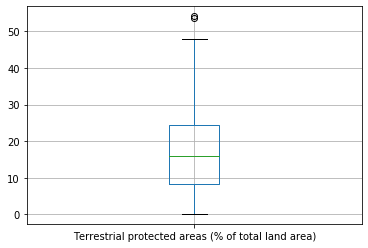

In [30]:
df_clean[['Terrestrial protected areas (% of total land area)']].boxplot(figsize = (6, 4))

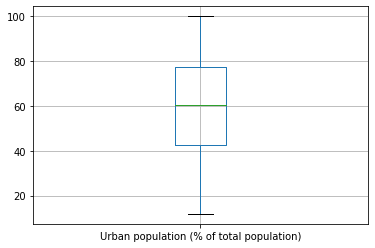

In [31]:
df_clean[['Urban population (% of total population)']].boxplot(figsize = (6, 4))

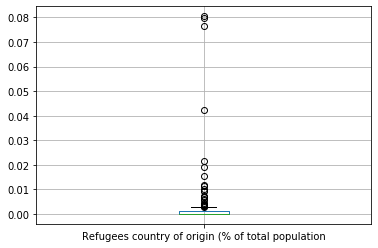

In [32]:
df_clean[['Refugees country of origin (% of total population']].boxplot(figsize = (6, 4))

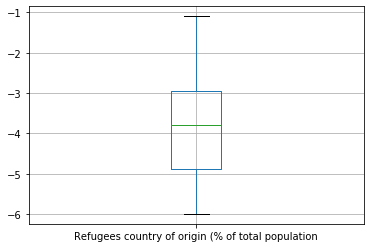

In [33]:
# improved with log transformation?

np.log10(df_clean[['Refugees country of origin (% of total population']]).boxplot(figsize = (6, 4))

# Yes, use log transformation

In [34]:
# perform log transformation on the following variables:
# 'CO2 emissions (metric tons per capita)'
# 'GDP per capita (current US$)'
# 'Land area (sq. km)'
# 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
# 'Population density (people per sq. km of land area)'
# 'Refugees country of origin (% of total population'

# make copy of df_clean
df_clean2 = df_clean.copy()

In [35]:
df_clean2['CO2 emissions (metric tons per capita)'] = np.log10(df_clean2['CO2 emissions (metric tons per capita)'])
df_clean2['GDP per capita (current US$)'] = np.log10(df_clean2['GDP per capita (current US$)'])
df_clean2['Land area (sq. km)'] = np.log10(df_clean2['Land area (sq. km)'])
df_clean2['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'] = np.log10(df_clean2['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'])
df_clean2['Population density (people per sq. km of land area)'] = np.log10(df_clean2['Population density (people per sq. km of land area)'])
df_clean2['Refugees country of origin (% of total population'] = np.log10(df_clean2['Refugees country of origin (% of total population'])

In [36]:
df_clean2.head()

,Score mean,CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,7.5114,0.675108,4.917220,86.791615,4.596773,83.026287,1.066573,100.000000,2.316057,1.052495,6.0,30.800,22.946425,7.0,9.660123,73.697333,-5.736739
1,7.5110,0.772409,4.743932,96.981917,5.001084,82.454472,0.856043,99.999999,0.517619,1.133978,7.0,41.440,76.467214,7.0,17.914355,93.675778,-5.066406
2,7.5460,0.845305,4.768797,94.347397,4.624156,80.440108,1.043249,99.999999,2.128672,0.531352,6.9,38.311,27.220085,6.0,17.921347,87.377222,-5.863501
3,7.5410,1.017703,4.944372,95.537903,5.562487,81.969919,0.886375,100.000000,1.146877,1.059666,7.0,39.903,57.320681,6.0,17.060995,80.678222,-5.709362
4,7.3506,1.182819,4.681754,86.422500,6.958732,81.732249,0.878417,99.353377,0.590806,1.078803,6.0,25.365,22.181059,6.0,9.687049,81.209556,-5.580018


In [37]:
# make a version of the df with scaled data

scaler = StandardScaler() 

scaled = scaler.fit_transform(df_clean2)
df_scaled = pd.DataFrame(scaled)    

df_scaled.columns = list(df_clean2.columns)

df_scaled.head()    

,Score mean,CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,1.919748,0.543000,1.821566,1.496033,-0.788665,1.390823,-1.270572,0.813178,0.829836,-0.325529,0.359717,0.881668,-0.405240,0.608458,-0.652560,0.644140,-1.562567
1,1.919387,0.681054,1.553274,1.853462,-0.304899,1.322917,-2.090252,0.813178,-2.166465,-0.261505,1.543301,1.851343,1.408236,0.608458,0.053549,1.547407,-1.011282
2,1.950975,0.784481,1.591770,1.761055,-0.755901,1.083703,-1.361382,0.813178,0.517643,-0.735013,1.424943,1.566182,-0.260433,-0.520411,0.054148,1.262636,-1.666817
3,1.946463,1.029086,1.863604,1.802812,0.366831,1.265375,-1.972156,0.813178,-1.118086,-0.319895,1.543301,1.711268,0.759483,-0.520411,-0.019451,0.959761,-1.540053
4,1.774621,1.263358,1.457005,1.483086,2.037465,1.237150,-2.003140,0.775436,-2.044531,-0.304858,0.359717,0.386350,-0.431173,-0.520411,-0.650257,0.983783,-1.433680


In [38]:
# make another one with robust scaler, to compare

scaler2 = RobustScaler() 

scaled2 = scaler2.fit_transform(df_clean2)
df_scaled2 = pd.DataFrame(scaled2)    

df_scaled2.columns = list(df_clean2.columns)

df_scaled2.head() 

,Score mean,CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,1.257866,0.240515,1.052523,0.831362,-0.717092,0.779752,-1.011237,0.255958,0.661637,-0.135674,0.0,0.787796,-0.088933,1.0,-0.395375,0.378964,-0.992567
1,1.257638,0.335463,0.893884,1.031392,-0.338148,0.732663,-1.663703,0.255958,-2.047532,-0.093038,1.0,1.536669,1.024816,1.0,0.114350,0.949655,-0.648802
2,1.277588,0.406596,0.916647,0.979678,-0.691427,0.566777,-1.083522,0.255958,0.379361,-0.408360,0.9,1.316441,0.000000,0.0,0.114781,0.769735,-1.057575
3,1.274738,0.574825,1.077380,1.003047,0.188032,0.692759,-1.569698,0.255958,-1.099618,-0.131922,1.0,1.428491,0.626383,0.0,0.061652,0.578375,-0.978528
4,1.166211,0.735948,0.836962,0.824116,1.496672,0.673187,-1.594362,0.227995,-1.937283,-0.121909,0.0,0.405265,-0.104860,0.0,-0.393712,0.593553,-0.912197


In [39]:
# save scaled2 df for future use:

df_scaled2.to_csv('df_scaled2.csv', index = False)


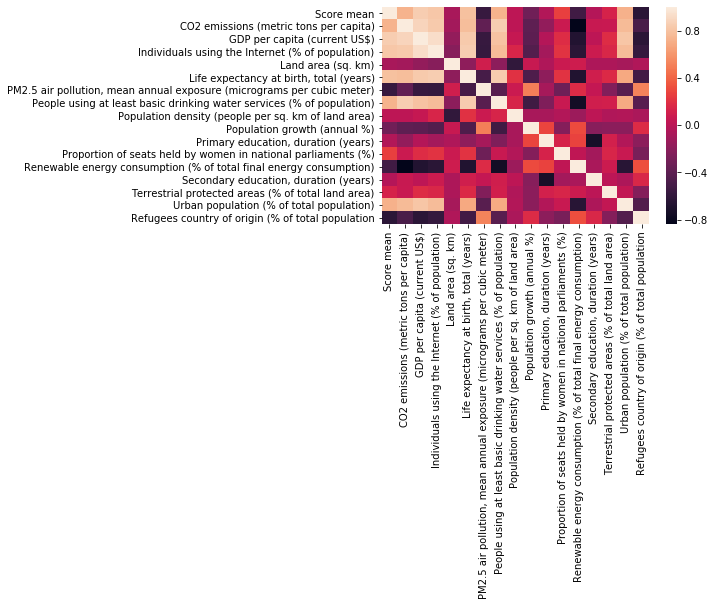

In [40]:
corr = df_scaled2.corr()
sns.heatmap(corr)

### Linear regression

In [42]:
# create and run model, average R2 scores over 1000 model runs

score_list = []

for i in range(1000):
    y = df_scaled2['Score mean']
    X = df_scaled2.drop(['Score mean'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    LM = linear_model.LinearRegression()
    
    LM.fit(X_train, y_train)
    
    y_pred = LM.predict(X_train)
    r2score_train = r2_score(y_train, y_pred)
    
    y_test_pred = LM.predict(X_test)
    r2score_test = r2_score(y_test, y_test_pred)
    
    score_list.append((r2score_train, r2score_test))

In [43]:
print(LM)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [44]:
score_df = pd.DataFrame(score_list, columns=('r2score_train', 'r2score_test'))
score_df.head()

,r2score_train,r2score_test
0,0.806405,0.776690
1,0.797689,0.823824
2,0.809591,0.765092
3,0.822079,0.733188
4,0.837640,0.444395


In [45]:
print(score_df.mean())

# The scaled (standard scaler) data performs pretty well, although there is an indication of overfitting, which is not surprising with so many variables

r2score_train    0.814776
r2score_test     0.731361
dtype: float64


In [46]:
# define function to run a linear regression model with 1000 cycles and calculate mean R2 socres for the test and train set

def linear_regression(df, test_size):
    
    score_list = []

    for i in range(1000):
        y = df['Score mean']
        X = df.drop(['Score mean'], axis=1)
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
        LM = linear_model.LinearRegression()
    
        LM.fit(X_train, y_train)
    
        y_pred = LM.predict(X_train)
        r2score_train = r2_score(y_train, y_pred)
    
        y_test_pred = LM.predict(X_test)
        r2score_test = r2_score(y_test, y_test_pred)
    
        score_list.append((r2score_train, r2score_test))
    
    score_df = pd.DataFrame(score_list, columns=('r2score_train', 'r2score_test'))
    
    return print(score_df.mean())

In [47]:
# use function with scaled data (standard scaled)

linear_regression(df_scaled, 0.20)

r2score_train    0.814266
r2score_test     0.733924
dtype: float64


In [48]:
# use function with scaled data 2 (robust scaled)
linear_regression(df_scaled2, 0.20)

# results very similar

r2score_train    0.814692
r2score_test     0.731118
dtype: float64


In [49]:
# The train data performs well but the test data less so indicating that the model is overfitted
# What happens when we increase the train size and decrease the test size (90-10)?

linear_regression(df_scaled, 0.10)

# performs slightly worse

r2score_train    0.810700
r2score_test     0.720896
dtype: float64


### Recursive feature elimination

In [50]:
# now try recursive feature elimination
# eliminate least important variables one by one
# collect R2 scores in dataframe

# first select 15 most important features

selector = RFE(LM, n_features_to_select=1, step=1)

selector = selector.fit(X, y)

selector.ranking_

array([12,  1,  6, 15,  2,  8,  5, 13,  7, 10,  9,  4, 11, 14, 16,  3])

In [51]:
# repeat few times (depends on model outcome)

# array([10,  1,  6, 15,  2, 13,  5, 11,  7,  8, 12,  4,  9, 14, 16,  3])
# array([10,  1,  6, 15,  2, 13,  5, 11,  7,  8, 12,  4,  9, 14, 16,  3])
# array([10,  1,  6, 15,  2, 13,  5, 11,  7,  8, 12,  4,  9, 14, 16,  3])
# array([10,  1,  6, 15,  2, 13,  5, 11,  7,  8, 12,  4,  9, 14, 16,  3])

# outcome always the same

In [52]:
# now try with robust scaled data

score_list = []

for i in range(1000):
    y = df_scaled2['Score mean']
    X = df_scaled2.drop(['Score mean'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    LM = linear_model.LinearRegression()
    
    LM.fit(X_train, y_train)
    
    y_pred = LM.predict(X_train)
    r2score_train = r2_score(y_train, y_pred)
    
    y_test_pred = LM.predict(X_test)
    r2score_test = r2_score(y_test, y_test_pred)
    
    score_list.append((r2score_train, r2score_test))

score_df = pd.DataFrame(score_list, columns=('r2score_train', 'r2score_test'))

print(score_df.mean())


r2score_train    0.813946
r2score_test     0.735935
dtype: float64


In [53]:
selector = RFE(LM, n_features_to_select=1, step=1)

selector = selector.fit(X, y)

selector.ranking_

array([12,  1,  6, 15,  2,  8,  5, 13,  7, 10,  9,  4, 11, 14, 16,  3])

In [54]:
# repeat few times (depends on model outcome)

# array([12,  1,  6, 15,  2,  8,  5, 13,  7, 10,  9,  4, 11, 14, 16,  3])
# array([12,  1,  6, 15,  2,  8,  5, 13,  7, 10,  9,  4, 11, 14, 16,  3])
# array([12,  1,  6, 15,  2,  8,  5, 13,  7, 10,  9,  4, 11, 14, 16,  3])

# outcome consistently the same, but slightly different than standard scaled



In [55]:
df_scaled2.head()

,Score mean,CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,1.257866,0.240515,1.052523,0.831362,-0.717092,0.779752,-1.011237,0.255958,0.661637,-0.135674,0.0,0.787796,-0.088933,1.0,-0.395375,0.378964,-0.992567
1,1.257638,0.335463,0.893884,1.031392,-0.338148,0.732663,-1.663703,0.255958,-2.047532,-0.093038,1.0,1.536669,1.024816,1.0,0.114350,0.949655,-0.648802
2,1.277588,0.406596,0.916647,0.979678,-0.691427,0.566777,-1.083522,0.255958,0.379361,-0.408360,0.9,1.316441,0.000000,0.0,0.114781,0.769735,-1.057575
3,1.274738,0.574825,1.077380,1.003047,0.188032,0.692759,-1.569698,0.255958,-1.099618,-0.131922,1.0,1.428491,0.626383,0.0,0.061652,0.578375,-0.978528
4,1.166211,0.735948,0.836962,0.824116,1.496672,0.673187,-1.594362,0.227995,-1.937283,-0.121909,0.0,0.405265,-0.104860,0.0,-0.393712,0.593553,-0.912197


In [56]:
# Order of importance of variables standard scaled
# up to 7 they're all the same

# 1: GDP per capita (current US$)
# 2: Life expectancy at birth, total (years)
# 3: Refugees country of origin (% of total population
# 4: Renewable energy consumption (% of total final energy consumption)
# 5: People using at least basic drinking water services (% of population)
# 6: Individuals using the Internet (% of population)
# 7: Population growth (annual %)

# 8: Primary education, duration (years)
# 9: Secondary education, duration (years)
# 10: CO2 emissions (metric tons per capita)
# 11: Population density (people per sq. km of land area)
# 12: Proportion of seats held by women in national parliaments (%)
# 13: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
# 14: Terrestrial protected areas (% of total land area)
# 15: Land area (sq. km)
# 16: Urban population (% of total population)


In [57]:
# Order of importance of variables robust scaled
# up to 7 they're all the same

# 1: GDP per capita (current US$)
# 2: Life expectancy at birth, total (years)
# 3: Refugees country of origin (% of total population
# 4: Renewable energy consumption (% of total final energy consumption)
# 5: People using at least basic drinking water services (% of population)
# 6: Individuals using the Internet (% of population)
# 7: Population growth (annual %)

# 8: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
# 9: Proportion of seats held by women in national parliaments (%)
# 10: Primary education, duration (years)
# 11: Secondary education, duration (years)
# 12: CO2 emissions (metric tons per capita)
# 13: Population density (people per sq. km of land area)
# 14: Terrestrial protected areas (% of total land area)
# 15: Land area (sq. km)
# 16: Urban population (% of total population)

# overall, robust scaled performs slightly better as a model and it works better with outliers so we're going forward with this one


In [58]:
dfscaled2_16 = df_scaled2.copy()
dfscaled2_16.head()

,Score mean,CO2 emissions (metric tons per capita),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"Secondary education, duration (years)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,1.257866,0.240515,1.052523,0.831362,-0.717092,0.779752,-1.011237,0.255958,0.661637,-0.135674,0.0,0.787796,-0.088933,1.0,-0.395375,0.378964,-0.992567
1,1.257638,0.335463,0.893884,1.031392,-0.338148,0.732663,-1.663703,0.255958,-2.047532,-0.093038,1.0,1.536669,1.024816,1.0,0.114350,0.949655,-0.648802
2,1.277588,0.406596,0.916647,0.979678,-0.691427,0.566777,-1.083522,0.255958,0.379361,-0.408360,0.9,1.316441,0.000000,0.0,0.114781,0.769735,-1.057575
3,1.274738,0.574825,1.077380,1.003047,0.188032,0.692759,-1.569698,0.255958,-1.099618,-0.131922,1.0,1.428491,0.626383,0.0,0.061652,0.578375,-0.978528
4,1.166211,0.735948,0.836962,0.824116,1.496672,0.673187,-1.594362,0.227995,-1.937283,-0.121909,0.0,0.405265,-0.104860,0.0,-0.393712,0.593553,-0.912197


In [59]:
dfscaled2_15 = dfscaled2_16.drop(['Urban population (% of total population)'], axis=1)
dfscaled2_14 = dfscaled2_15.drop(['Land area (sq. km)'], axis=1)
dfscaled2_13 = dfscaled2_14.drop(['Terrestrial protected areas (% of total land area)'], axis=1)
dfscaled2_12 = dfscaled2_13.drop(['Population density (people per sq. km of land area)'], axis=1)
dfscaled2_11 = dfscaled2_12.drop(['CO2 emissions (metric tons per capita)'], axis=1)
dfscaled2_10 = dfscaled2_11.drop(['Secondary education, duration (years)'], axis=1)
dfscaled2_9 = dfscaled2_10.drop(['Primary education, duration (years)'], axis=1)
dfscaled2_8 = dfscaled2_9.drop(['Proportion of seats held by women in national parliaments (%)'], axis=1)
dfscaled2_7 = dfscaled2_8.drop(['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'], axis=1)
dfscaled2_6 = dfscaled2_7.drop(['Population growth (annual %)'], axis=1)
dfscaled2_5 = dfscaled2_6.drop(['Individuals using the Internet (% of population)'], axis=1)
dfscaled2_4 = dfscaled2_5.drop(['People using at least basic drinking water services (% of population)'], axis=1)
dfscaled2_3 = dfscaled2_4.drop(['Renewable energy consumption (% of total final energy consumption)'], axis=1)
dfscaled2_2 = dfscaled2_3.drop(['Refugees country of origin (% of total population'], axis=1)
dfscaled2_1 = dfscaled2_2.drop(['Life expectancy at birth, total (years)'], axis=1)


In [60]:
dfscaled2_2.head()

,Score mean,GDP per capita (current US$),"Life expectancy at birth, total (years)"
0,1.257866,1.052523,0.779752
1,1.257638,0.893884,0.732663
2,1.277588,0.916647,0.566777
3,1.274738,1.077380,0.692759
4,1.166211,0.836962,0.673187


In [61]:
linear_regression(dfscaled2_16, 0.20)

r2score_train    0.814491
r2score_test     0.732796
dtype: float64


In [62]:
linear_regression(dfscaled2_15, 0.20)

r2score_train    0.813778
r2score_test     0.737310
dtype: float64


In [63]:
linear_regression(dfscaled2_14, 0.20)

r2score_train    0.812433
r2score_test     0.740537
dtype: float64


In [64]:
linear_regression(dfscaled2_13, 0.20)

r2score_train    0.809851
r2score_test     0.738034
dtype: float64


In [65]:
linear_regression(dfscaled2_12, 0.20)

r2score_train    0.803723
r2score_test     0.736750
dtype: float64


In [66]:
linear_regression(dfscaled2_11, 0.20)

r2score_train    0.803224
r2score_test     0.741325
dtype: float64


In [67]:
linear_regression(dfscaled2_10, 0.20)

r2score_train    0.798569
r2score_test     0.743645
dtype: float64


In [68]:
linear_regression(dfscaled2_9, 0.20)

r2score_train    0.798361
r2score_test     0.737628
dtype: float64


In [69]:
linear_regression(dfscaled2_8, 0.20)

r2score_train    0.791627
r2score_test     0.736519
dtype: float64


In [70]:
linear_regression(dfscaled2_7, 0.20)

r2score_train    0.783487
r2score_test     0.736218
dtype: float64


In [71]:
linear_regression(dfscaled2_6, 0.20)

r2score_train    0.775094
r2score_test     0.732793
dtype: float64


In [72]:
linear_regression(dfscaled2_5, 0.20)

r2score_train    0.773357
r2score_test     0.738944
dtype: float64


In [73]:
linear_regression(dfscaled2_4, 0.20)

r2score_train    0.769956
r2score_test     0.733465
dtype: float64


In [74]:
linear_regression(dfscaled2_3, 0.20)

r2score_train    0.763211
r2score_test     0.725022
dtype: float64


In [75]:
linear_regression(dfscaled2_2, 0.20)

r2score_train    0.746150
r2score_test     0.720704
dtype: float64


In [77]:
linear_regression(dfscaled2_1, 0.20)

r2score_train    0.725503
r2score_test     0.699218
dtype: float64


In [78]:
# put into dataframe

data = [[1, 0.724442, 0.701563],
        [2, 0.746336, 0.719748],
        [3, 0.761416, 0.735143],
        [4, 0.769537, 0.736243],
        [5, 0.774668, 0.733050],
        [6, 0.775586, 0.731938],
        [7, 0.783696, 0.736203],
        [8, 0.791826, 0.735551],
        [9, 0.798138, 0.737627],
        [10, 0.798904, 0.740897],
        [11, 0.803905, 0.736488],
        [12, 0.803887, 0.736370],
        [13, 0.809217, 0.744408],
        [14, 0.813000, 0.737465],
        [15, 0.813834, 0.736007],
        [16, 0.814454, 0.733431]]

df_R2_scores = pd.DataFrame(data, columns = ['Nr of variables', 'R2_score_train', 'R2_score_test'])
df_R2_scores

,Nr of variables,R2_score_train,R2_score_test
0,1,0.724442,0.701563
1,2,0.746336,0.719748
2,3,0.761416,0.735143
3,4,0.769537,0.736243
4,5,0.774668,0.733050
5,6,0.775586,0.731938
6,7,0.783696,0.736203
7,8,0.791826,0.735551
8,9,0.798138,0.737627
9,10,0.798904,0.740897


In [79]:
dfr2_melt = pd.melt(df_R2_scores, id_vars = ['Nr of variables'], value_vars = ['R2_score_train', 'R2_score_test'])
dfr2_melt

,Nr of variables,variable,value
0,1,R2_score_train,0.724442
1,2,R2_score_train,0.746336
2,3,R2_score_train,0.761416
3,4,R2_score_train,0.769537
4,5,R2_score_train,0.774668
5,6,R2_score_train,0.775586
6,7,R2_score_train,0.783696
7,8,R2_score_train,0.791826
8,9,R2_score_train,0.798138
9,10,R2_score_train,0.798904


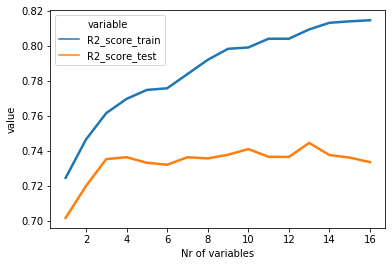

In [80]:
sns.lineplot(x = 'Nr of variables', y = 'value', hue = 'variable', data = dfr2_melt, linewidth=2.5)

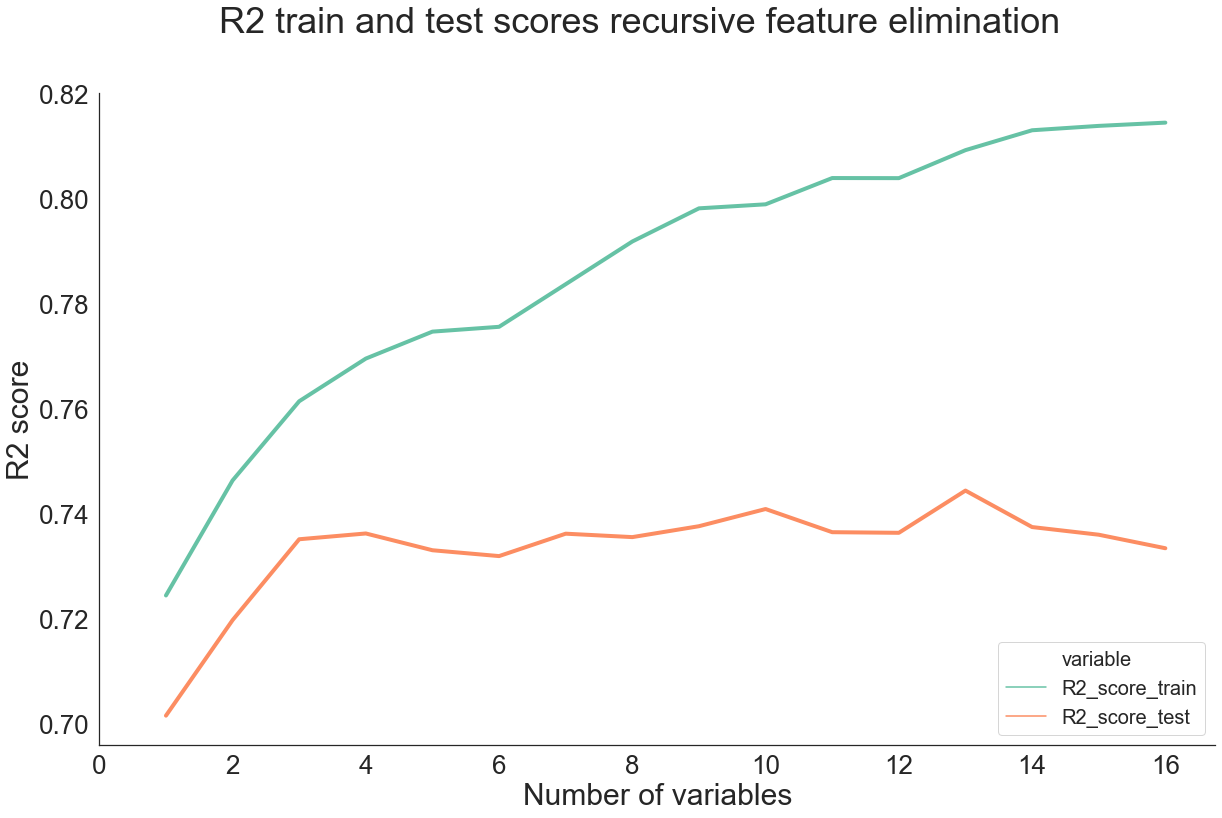

In [99]:
sns.set()
sns.set_style('white')
sns.set_color_codes('pastel')

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Nr of variables', y = 'value', hue = 'variable', palette = 'Set2', data = dfr2_melt, linewidth=4)

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.set_xticks(range(0, 17, 2))

ax.legend(loc="lower right", frameon=True, fontsize = 20)

plt.xlabel('Number of variables', fontsize=30)
plt.ylabel('R2 score', fontsize=30)
plt.suptitle('R2 train and test scores recursive feature elimination', fontsize=36)

sns.despine()

In [82]:
# Figures
# make regression plot of the top variables with happiness score
# use scaled data 2
# first, rename columns for presentation purposes
# make new df with renamed columns

df_scaled3 = df_scaled2.copy()


In [83]:
list(df_scaled3.columns)

['Score mean',
 'CO2 emissions (metric tons per capita)',
 'GDP per capita (current US$)',
 'Individuals using the Internet (% of population)',
 'Land area (sq. km)',
 'Life expectancy at birth, total (years)',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
 'People using at least basic drinking water services (% of population)',
 'Population density (people per sq. km of land area)',
 'Population growth (annual %)',
 'Primary education, duration (years)',
 'Proportion of seats held by women in national parliaments (%)',
 'Renewable energy consumption (% of total final energy consumption)',
 'Secondary education, duration (years)',
 'Terrestrial protected areas (% of total land area)',
 'Urban population (% of total population)',
 'Refugees country of origin (% of total population']

In [84]:
df_scaled3 = df_scaled3.rename(columns = {'Score mean': 'Happiness score',
                                          'CO2 emissions (metric tons per capita)': 'CO2 emission per capita',
                                          'GDP per capita (current US$)': 'GDP per capita',
                                          'Individuals using the Internet (% of population)': 'Access to electricity %',
                                          'Land area (sq. km)': 'Land area',
                                          'Life expectancy at birth, total (years)': 'Life expectancy',
                                          'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)': 'Air pollution',
                                          'People using at least basic drinking water services (% of population)': 'Drinking water services',
                                          'Population density (people per sq. km of land area)': 'Population density',
                                          'Population growth (annual %)': 'Population growth',
                                          'Primary education, duration (years)': 'Primary education years',
                                          'Proportion of seats held by women in national parliaments (%)': 'Women in parliament %',
                                          'Renewable energy consumption (% of total final energy consumption)': 'Renewable energy %',
                                          'Secondary education, duration (years)': 'Secondary education years',
                                          'Terrestrial protected areas (% of total land area)': 'Protected land %',
                                          'Urban population (% of total population)': 'Urban population',
                                          'Refugees country of origin (% of total population': 'Refugees %'})

df_scaled3.head()

,Happiness score,CO2 emission per capita,GDP per capita,Access to electricity %,Land area,Life expectancy,Air pollution,Drinking water services,Population density,Population growth,Primary education years,Women in parliament %,Renewable energy %,Secondary education years,Protected land %,Urban population,Refugees %
0,1.257866,0.240515,1.052523,0.831362,-0.717092,0.779752,-1.011237,0.255958,0.661637,-0.135674,0.0,0.787796,-0.088933,1.0,-0.395375,0.378964,-0.992567
1,1.257638,0.335463,0.893884,1.031392,-0.338148,0.732663,-1.663703,0.255958,-2.047532,-0.093038,1.0,1.536669,1.024816,1.0,0.114350,0.949655,-0.648802
2,1.277588,0.406596,0.916647,0.979678,-0.691427,0.566777,-1.083522,0.255958,0.379361,-0.408360,0.9,1.316441,0.000000,0.0,0.114781,0.769735,-1.057575
3,1.274738,0.574825,1.077380,1.003047,0.188032,0.692759,-1.569698,0.255958,-1.099618,-0.131922,1.0,1.428491,0.626383,0.0,0.061652,0.578375,-0.978528
4,1.166211,0.735948,0.836962,0.824116,1.496672,0.673187,-1.594362,0.227995,-1.937283,-0.121909,0.0,0.405265,-0.104860,0.0,-0.393712,0.593553,-0.912197


In [85]:
# save df scaled3 for future use

df_scaled3.to_csv('df_scaled2.csv', index = False)


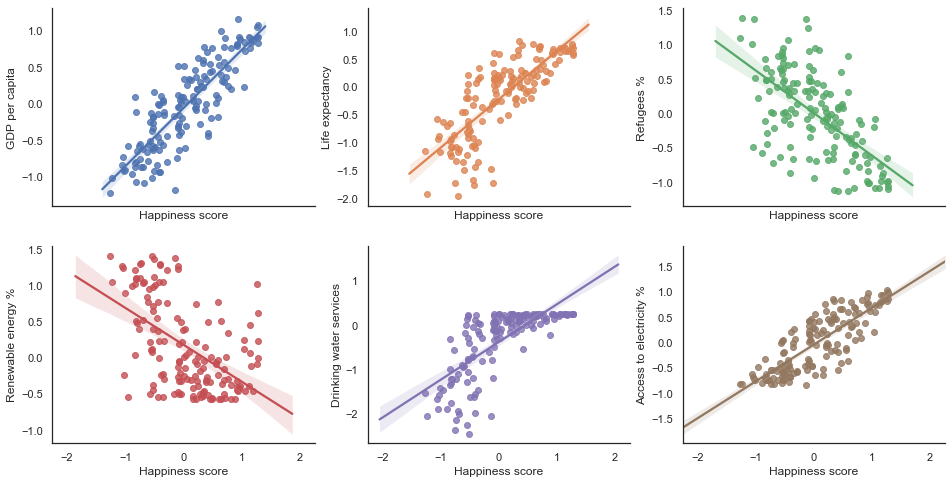

In [86]:
x = df_scaled3['Happiness score']

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
sns.regplot(x = x, y = df_scaled3['GDP per capita'], ax=axes[0, 0])
sns.regplot(x = x, y = df_scaled3['Life expectancy'], ax=axes[0, 1])
sns.regplot(x = x, y = df_scaled3['Refugees %'], ax=axes[0, 2])
sns.regplot(x = x, y = df_scaled3['Renewable energy %'], ax=axes[1, 0])
sns.regplot(x = x, y = df_scaled3['Drinking water services'], ax=axes[1, 1])
sns.regplot(x = x, y = df_scaled3['Access to electricity %'], ax=axes[1, 2])

# plt.suptitle('Regression of top 6 variables with Happiness score', fontsize=24)

sns.despine()

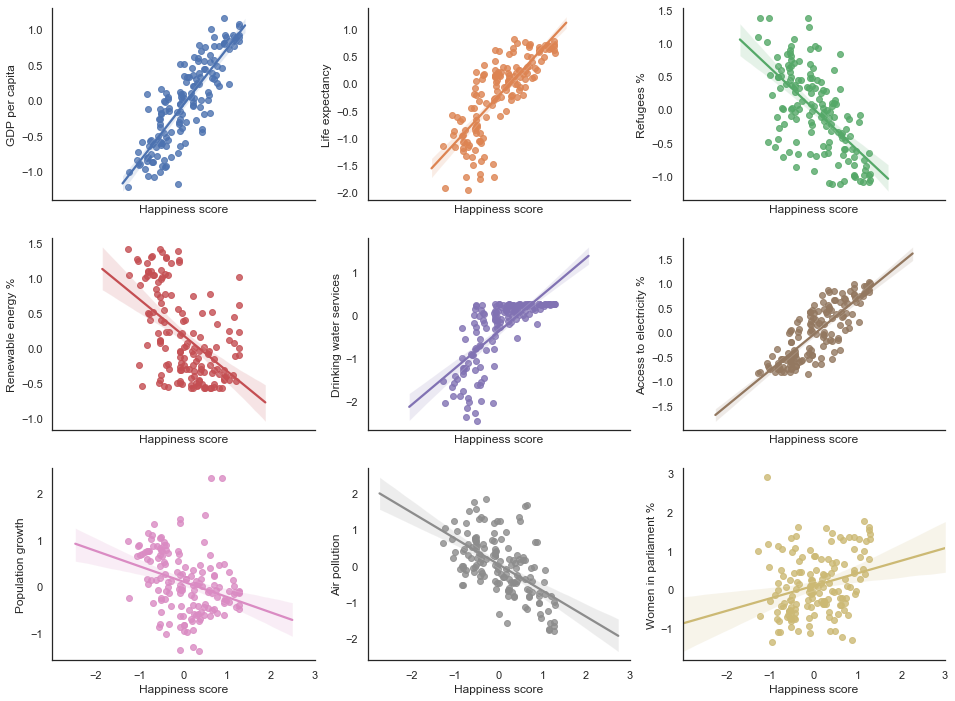

In [87]:
# Figures
# make regression plot of the top variables with happiness score
# use scaled data

x = df_scaled3['Happiness score']

f, axes = plt.subplots(3, 3, figsize=(16, 12), sharex=True)
sns.regplot(x = x, y = df_scaled3['GDP per capita'], ax=axes[0, 0])
sns.regplot(x = x, y = df_scaled3['Life expectancy'], ax=axes[0, 1])
sns.regplot(x = x, y = df_scaled3['Refugees %'], ax=axes[0, 2])
sns.regplot(x = x, y = df_scaled3['Renewable energy %'], ax=axes[1, 0])
sns.regplot(x = x, y = df_scaled3['Drinking water services'], ax=axes[1, 1])
sns.regplot(x = x, y = df_scaled3['Access to electricity %'], ax=axes[1, 2])
sns.regplot(x = x, y = df_scaled3['Population growth'], ax=axes[2, 0])
sns.regplot(x = x, y = df_scaled3['Air pollution'], ax=axes[2, 1])
sns.regplot(x = x, y = df_scaled3['Women in parliament %'], ax=axes[2, 2])

sns.despine()